In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize, rosen, rosen_der

## Using Google disk for needed files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My Drive/SCM

/content/drive/My Drive/SCM


## Genrating dataset
Initial distributions
- lorenz function
- gaussian 
Using fortran program -> get probabilities distributions and success rate.

As the result have about 600 samples in dataset.


In [ ]:
def lorenz(x0,a,i):
  return 1/((i-x0)**2 + a**2)

In [ ]:
def f_norm(sigma,mu,x):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*sigma**2))

In [ ]:
def new_input (x0,a,f,i):
    N = 51 
    x = []
    y = []
    t = 1
    num1 = 50000
    f.write(str(N-1) + '\t'+ str(t) + '\n' + str(num1)+ '\t'+ str(t) +'\t' + str(10000)+ '\t'+ str(t) + '\n' )
    for i in range (N):
        x.append(i)
        y.append(-lapl(x0,a,i))
        
        f.write (str(i) + '\t' + str(y[i]) + '\n')
    #plt.plot(x,y)
    f.close()
    return np.array(y)

In [ ]:
X = np.zeros((600,51))
Y_pos_new = np.zeros((600, 10001))
Y_neg_new = np.zeros((600,10001))
rate = np.zeros(600)

In [ ]:
import numpy as np
import pandas as pd
import subprocess

a = np.arange(5,10,0.05)
b = np.arange(10,40,0.25)
c = np.arange(80,100,0.2)
for i in range (100):
  f = open('new_input.txt', 'w')
  X[i+500] = new_input(np.random.choice(a),np.random.choice(b), f, np.random.choice(c))
  subprocess.call(["gfortran","-o","outputtt","F.f90"])#create
  #subprocess.call(["./outputtt"])
  subprocess.check_output(["./outputtt"])

  #saving new output data
  dat = pd.read_csv('./new_output.txt', sep=' ',skiprows=[0,1], header=None)
  dat.drop(dat.columns[0], axis = 1, inplace = True)
  print(i)
  Y_pos_new[i+500] = np.array(dat[:][1])
  Y_neg_new[i+500] = np.array(dat[:][2])
  rate[i+500] = float(pd.read_csv('./new_output.txt', sep=' ',nrows=1, header=None)[11])

## Saving data into a file

In [ ]:

for i in range(60,80):
  print(np.log(Y_pos_new[i][1:])-np.log(Y_pos_real[1:]))

In [ ]:
data_rate = pd.DataFrame(rate)
data_x = pd.DataFrame(X)
data_y_pos = pd.DataFrame(Y_pos_new)
data_y_neg = pd.DataFrame(Y_neg_new)

In [ ]:
data_rate.to_csv('rate for save')
data_x.to_csv('X for save')
data_y_pos.to_csv('y_pos for save')
data_y_neg.to_csv('y_neg for save')

## Reading input data (X) from train set, that we have

In [ ]:
X = pd.read_csv('X for save').set_index('Unnamed: 0')

In [ ]:
X = np.array(X)

## Paramert. input data
Parametrize input data with a polinoms 5-th degree.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# needed step
X_parametr = np.zeros([X.shape[0], 7])
for i in range (X.shape[0]):
    poly = Pipeline([('poly', PolynomialFeatures(degree=6)), ('linear', LinearRegression(fit_intercept=False))])
    a = np.arange (51)
    b = X[i]
    #plt.plot(a,b)
    poly.fit(a.reshape(-1,1), b)
    b_pred = poly.predict(a.reshape(-1,1))
    X_parametr[i] = np.array(poly.named_steps['linear'].coef_)
    #plt.plot(a,b)
    #plt.plot(a,b_pred)

## Inverse parametrise (we have the cofficients and want to go back to distribution)
Function to go from parameterized input energy distribution back to real distribution

[ 4.40081469e-02  6.20645112e-03  2.48974529e-03 -2.38333863e-04
  2.51882330e-05 -1.06182323e-06  1.81645664e-08 -6.65330208e-11]
[ 1.16483316e+00  7.80546999e-02  9.48049437e-04 -3.40009807e-04
  4.15379275e-06  2.49718945e-07 -6.86170409e-09  4.90330970e-11]


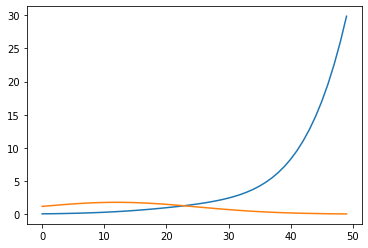

In [ ]:
def polynom(x, param):
  return x*param[1]+ x**2*param[2]+ x**3*param[3] + x**4*param[4] + x**5*param[5] + x**6*param[6] + x**7*param[7] + param[0]
hhh = []
hehe = []
for i in range (50):
  hhh.append(polynom(i, x_end))
  hehe.append(polynom(i, X_parametr[2]))
print(x_end)
print(X_parametr[2])
plt.plot(hhh)
plt.plot(np.arange(50),hehe)

## Upload Y_data and rate

In [ ]:
Y_pos_new = pd.read_csv('y_pos for save').set_index('Unnamed: 0')

In [ ]:
Y_neg_new = pd.read_csv('y_neg for save').set_index('Unnamed: 0')

In [ ]:
rate = pd.read_csv('rate for save').set_index('Unnamed: 0')

## Real data
Real data

In [ ]:
dat = pd.read_csv('try_to_estim_1.txt', sep='\t',skiprows=[0,1], header=None)
X_real = np.array(dat[:][1])

In [ ]:
dat2 = pd.read_csv('try_to_estim_res1.txt', sep=' ',skiprows=[0,1], header=None)
dat2.drop(dat2.columns[0], axis = 1, inplace = True)
Y_pos_real = np.array(dat2[:][1])
Y_neg_real = np.array(dat2[:][2])

In [ ]:
dat2 = pd.read_csv('try_to_estim_res1.txt', sep=' ',nrows=1, header=None)
rate_real = float(dat2[11])

## Not real data
Data was generate to test, if the regressor somehow works (or not)

In [ ]:
dat_t = pd.read_csv('try_to_estim.txt', sep='\t',skiprows=[0,1], header=None)
X_try = np.array(dat_t[:][1])

In [ ]:
dat_tr = pd.read_csv('try_to_estim_res.txt', sep=' ',skiprows=[0,1], header=None)
dat_tr.drop(dat_tr.columns[0], axis = 1, inplace = True)
Y_pos_try = np.array(dat_tr[:][1])
Y_neg_try = np.array(dat_tr[:][2])

### Parameterizing real and test data

In [ ]:
poly = Pipeline([('poly', PolynomialFeatures(degree=6)), ('linear', LinearRegression(fit_intercept=False))])
a = np.arange (51)
b = X_try
#b = X_real
    #plt.plot(a,b)
poly.fit(a.reshape(-1,1), b)
b_pred = poly.predict(a.reshape(-1,1))
#X_parametr_real = np.array(poly.named_steps['linear'].coef_)
X_parametr_try = np.array(poly.named_steps['linear'].coef_)

## MSE for data
Finding difference as MSE in logscale for y-coordinates. I suppose, that it shouldn't work this way and exactly here there is a mistake.

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
diff_pos = np.zeros(Y_pos_new.shape[0])
diff_neg = np.zeros(Y_pos_new.shape[0])
diff = np.zeros(Y_pos_new.shape[0])
for i in range (len(Y_pos_new)):
  diff_pos[i] = mse(np.log(Y_pos_new[i][1:]),np.log(Y_pos_real[1:]))
  #print(diff_pos[i])
  diff_neg[i] = mse(np.log(Y_neg_new[i][1:]),np.log(Y_neg_real[1:]))
  #print(diff_neg[i])
  diff[i] = diff_pos[i]+ diff_neg[i]
  #print(diff[i])




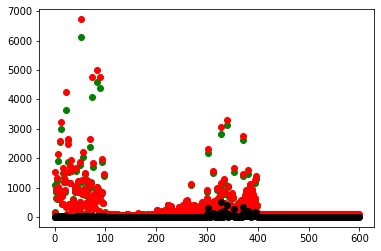

In [ ]:
plt.scatter(np.arange(600),diff_pos, color = 'green')
#plt.title('MSE with positive')
#plt.show()
plt.scatter(np.arange(600),diff_neg, color = 'red')
#plt.title('MSE with negative')
#plt.show()
plt.scatter(np.arange(600),diff, color = 'black')
#plt.title('Neg+pos (1:1)')


In [ ]:
print(mse(np.log(Y_pos_try[1:]),np.log(Y_pos_real[1:])))
  #print(diff_pos[i])
print(mse(np.log(Y_neg_try[1:]),np.log(Y_neg_real[1:])))
  #print(diff_neg[i])
print(abs(rate_try)*mse(np.log(Y_pos_try[1:]),np.log(Y_pos_real[1:]))+ abs(rate_try)*mse(np.log(Y_neg_try[1:]),np.log(Y_neg_real[1:])))

359.6730266875505
424.54685414284756
8.76420612219628


## Using Fortran to compute outputs
The part to read files and process them using fortran program (this program is on google disk and it was a little bit changed to read and give outputs in certan files)

In [ ]:
import subprocess

subprocess.call(["gfortran","-o","output_f","F.f90"])#create
subprocess.check_call(["./output_f"])
subprocess.check_output(["./output_f"])

b' Fortran runs\n'

## Scaling
Using a pre processing procedure: scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_concat = np.concatenate((X_parametr,X_parametr_real.reshape(1,-1)), axis=0)
X_concat= np.concatenate((X_concat,X_parametr_try.reshape(1,-1)), axis=0)

In [ ]:
scaler.fit(X_concat)
X_param_scaled = scaler.transform(X_concat)

In [ ]:
X_train = X_param_scaled[:-2]


In [ ]:
rel = X_param_scaled[-2]

In [ ]:
tr = X_param_scaled[-1]

## Gaussian regression
Using Gaussian Process Regressor with RBF and Constant kernels. 

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

kernel =  RBF()
gpr = GaussianProcessRegressor(kernel = kernel, optimizer='fmin_l_bfgs_b', n_restarts_optimizer = 50 ).fit(X_train,diff)

In [ ]:
#Finding best parametrs using optimizer='fmin_l_bfgs_b'
pr.kernel_.get_params()

{'length_scale': 1.190619510556994e-05,
 'length_scale_bounds': (1e-05, 100000.0)}

In [ ]:
gpr.log_marginal_likelihood_value_

-542802.7968700503

In [ ]:
#Prediction for real distribution
gpr.predict((rel).reshape(1,-1), return_std=True)

(array([0.]), array([1.]))

In [ ]:
#Prediction for test distribution
gpr.predict((tr).reshape(1,-1), return_std=True)

(array([0.]), array([1.]))

## Optimization

In [ ]:
def optimiz ()
fun = lambda x: gpr.predict(x.reshape(1,-1))
res = minimize(fun, (X_parametr_try_1*10**5).reshape(1,-1), method='Powell', jac=rosen_der,
               options={'disp': True})

Optimization terminated successfully.
         Current function value: 3464.632825
         Iterations: 2
         Function evaluations: 176


/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


In [ ]:
res.x

array([-2.53147324e+03, -5.09279039e+01, -2.90469389e-01,  3.75670352e-03,
        1.20862341e-04, -1.02999745e-06,  1.78872924e-07])

## Just usial regression
Using usial probabilistic approach for regression: Gradient Boosting Regressor.

Trying to find good parametrs through the greedserch.

In [ ]:
from sklearn import ensemble 
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

In [ ]:
params_grid = {
    'n_estimators': [100,150,200],
    'learning_rate': np.arange(0.01,1,0.05),
    'max_depth': np.arange(6,25)
}

In [ ]:
cv = KFold(n_splits = 4, shuffle = True, random_state = 1)

In [ ]:
gs = GridSearchCV(gbt, param_grid = params_grid, cv = cv, n_jobs = -1, verbose = 1)

In [ ]:
gs.fit(Xxxx, diff)

Fitting 4 folds for each of 1140 candidates, totalling 4560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1928 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3228 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4560 out of 4560 | elapsed:  5.0min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=1, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight...
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.06, 0.11, 0.16

In [ ]:
gs.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}

In [ ]:
from sklearn.metrics import r2_score as r2
print('Tree R2', r2(diff, y_pred_tr))

In [ ]:
gs.best_estimator_.predict(rel.reshape(1,-1))


array([5.59410124])

In [ ]:
gs.best_estimator_.predict(tr.reshape(1,-1))

array([12.88664269])

In [ ]:
min(diff)

0.013701151172257883

# XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xg_reg = xgb.XGBRegressor(tree_method="gpu_hist")
params_grid = {
    'n_estimators': [100,150,200],
    'learning_rate': np.arange(0.01,1,0.05),
    'max_depth': np.arange(6,25)
}

In [ ]:
cv = KFold(n_splits = 4, shuffle = True, random_state = 1)

In [ ]:
gs = GridSearchCV(xg_reg, param_grid = params_grid, cv = cv, verbose = 1)

In [ ]:
gs.fit(Xxxx, diff)

Fitting 4 folds for each of 1140 candidates, totalling 4560 fits
[06:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[06:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyboardInterrupt: ignored

## Whole programm (Without scaling now)

In [ ]:
for number in range (1):
  i_init = diff.argmin()
  diff_init = diff[i_init]
  print(diff.shape)
  diff = np.delete(diff, i_init, 0)
  print(diff.shape)
  X_init = X_parametr[i_init]
  print(X_parametr.shape)
  X_parametr = np.delete(X_parametr, i_init,0)
  print(X_parametr.shape)
  #GPR
  #kernel = ConstantKernel(5) * RBF(4)
  #gpr = GaussianProcessRegressor(kernel = kernel,n_restarts_optimizer=50, alpha=0.1, normalize_y=True).fit(X_parametr, diff)
  
  #Another regression model 
  params_grid = {
    'n_estimators': [100,150,200],
    'learning_rate': np.arange(0.01,1,0.08),
    'max_depth': np.arange(6,25)
  }
  cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
  gs = GridSearchCV(gbt, param_grid = params_grid, cv = cv, n_jobs = -1, verbose = 1)
  
  #Optimization with scipy
  fun = lambda x: gpr.predict(x.reshape(1,-1))
  res = minimize(fun, (X_init).reshape(1,-1), method='Powell', jac=rosen_der,
               options={'disp': True})
  print(X_init)
  x_end = res.x
  print (x_end)
  #saving new input data
  N = 51
  t = 1
  num1 = 50000
  f = open('new_input.txt', 'w')
  f.write(str(N-1) + '\t'+ str(t) + '\n' + str(num1)+ '\t'+ str(t) +'\t' + str(20000)+ '\t'+ str(t) + '\n' )
  x = []
  y = []
  for i in range (N):
        x.append(i)
        y.append(polynom(i, x_end))
        f.write (str(i) + '\t' + str(y[i]) + '\n')
  f.close()
  print(x_end)
  plt.plot(y)
  #break
  # Fortran working
  print('we near fortran')
  subprocess.call(["gfortran","-o","outputtt","F.f90"])#create
  #subprocess.call(["./outputtt"])
  subprocess.check_output(["./outputtt"])

  #saving new output data
  dat = pd.read_csv('./new_output.txt', sep=' ',skiprows=[0,1], header=None)
  dat.drop(dat.columns[0], axis = 1, inplace = True)
  Y_pos_new = np.array(dat[:][1])
  Y_neg_new = np.array(dat[:][2])

  #MSE
  diff_new = mse(np.log(Y_pos_new[1:]),np.log(Y_pos_real[1:])) + mse(np.log(Y_neg_new[1:]),np.log(Y_neg_real[1:]))
  
  #Merging the data
  #s = np.zeros((3,3))
  #s = np.vstack([s, np.ones(3)])
  
  X_parametr = np.vstack([X_parametr, X_init])
  diff = np.vstack([diff, diff_new])
  
  